In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import io 
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment (1).csv to CarPrice_Assignment (1).csv


In [ ]:
data = pd.read_csv(io.StringIO(uploaded['CarPrice_Assignment (1).csv'].decode('utf-8')), sep = ',')

In [ ]:
data = data.sample(frac=1)

In [ ]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
86,87,1,mitsubishi pajero,gas,std,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2405,ohc,four,122,2bbl,3.35,3.460,8.5,88,5000,25,32,8189.0
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3157,ohc,four,130,mpfi,3.62,3.150,7.5,162,5100,17,22,18950.0
179,180,3,toyota corona,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,3016,dohc,six,171,mpfi,3.27,3.350,9.3,161,5200,19,24,15998.0
55,56,3,mazda 626,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,10945.0
115,116,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,l,four,120,mpfi,3.46,3.190,8.4,97,5000,19,24,16630.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 86 to 125
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 

In [ ]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
data.drop(columns='car_ID', inplace=True)
data.drop(columns='CarName', inplace=True)
data.head(10)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
86,1,gas,std,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2405,ohc,four,122,2bbl,3.35,3.460,8.5,88,5000,25,32,8189.0
199,-1,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3157,ohc,four,130,mpfi,3.62,3.150,7.5,162,5100,17,22,18950.0
179,3,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,3016,dohc,six,171,mpfi,3.27,3.350,9.3,161,5200,19,24,15998.0
55,3,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,10945.0
115,0,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,l,four,120,mpfi,3.46,3.190,8.4,97,5000,19,24,16630.0
43,0,gas,std,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.230,8.5,78,4800,24,29,6785.0
30,2,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1713,ohc,four,92,1bbl,2.91,3.410,9.6,58,4800,49,54,6479.0
73,0,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.350,8.0,184,4500,14,16,40960.0
183,2,gas,std,two,sedan,fwd,front,97.3,171.7,65.5,55.7,2209,ohc,four,109,mpfi,3.19,3.400,9.0,85,5250,27,34,7975.0
87,1,gas,turbo,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2403,ohc,four,110,spdi,3.17,3.460,7.5,116,5500,23,30,9279.0


In [ ]:
data = pd.get_dummies(data, prefix=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem' ])

In [ ]:
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
86,1,96.3,172.4,65.4,51.6,2405,122,3.35,3.460,8.5,88,5000,25,32,8189.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
199,-1,104.3,188.8,67.2,57.5,3157,130,3.62,3.150,7.5,162,5100,17,22,18950.0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
179,3,102.9,183.5,67.7,52.0,3016,171,3.27,3.350,9.3,161,5200,19,24,15998.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
55,3,95.3,169.0,65.7,49.6,2380,70,3.33,3.255,9.4,101,6000,17,23,10945.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
115,0,107.9,186.7,68.4,56.7,3075,120,3.46,3.190,8.4,97,5000,19,24,16630.0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
data.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_m

In [ ]:
y = data['price']
y

86      8189.0
199    18950.0
179    15998.0
55     10945.0
115    16630.0
        ...   
62     10245.0
191    13295.0
38      9095.0
149    11694.0
125    22018.0
Name: price, Length: 205, dtype: float64

In [ ]:
data.drop(columns='price', inplace=True)

In [ ]:
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
86,1,96.3,172.4,65.4,51.6,2405,122,3.35,3.460,8.5,88,5000,25,32,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
199,-1,104.3,188.8,67.2,57.5,3157,130,3.62,3.150,7.5,162,5100,17,22,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
179,3,102.9,183.5,67.7,52.0,3016,171,3.27,3.350,9.3,161,5200,19,24,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
55,3,95.3,169.0,65.7,49.6,2380,70,3.33,3.255,9.4,101,6000,17,23,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
115,0,107.9,186.7,68.4,56.7,3075,120,3.46,3.190,8.4,97,5000,19,24,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
data.shape

(205, 52)

In [19]:
X_train = data[:104]
Y_train = y[:104]
X_test = data[104:165]
Y_test = y[104:165]
X_val = data[165:]
Y_val = y[165:]

In [20]:
X_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
86,1,96.3,172.4,65.4,51.6,2405,122,3.35,3.460,8.5,88,5000,25,32,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
199,-1,104.3,188.8,67.2,57.5,3157,130,3.62,3.150,7.5,162,5100,17,22,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
179,3,102.9,183.5,67.7,52.0,3016,171,3.27,3.350,9.3,161,5200,19,24,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
55,3,95.3,169.0,65.7,49.6,2380,70,3.33,3.255,9.4,101,6000,17,23,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
115,0,107.9,186.7,68.4,56.7,3075,120,3.46,3.190,8.4,97,5000,19,24,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0,98.8,177.8,66.5,55.5,2443,122,3.39,3.390,22.7,64,4650,36,42,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
129,1,98.4,175.7,72.3,50.5,3366,203,3.94,3.110,10.0,288,5750,17,28,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
131,2,96.1,176.8,66.6,50.5,2460,132,3.46,3.900,8.7,90,5100,23,31,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
17,0,110.0,197.0,70.9,56.3,3505,209,3.62,3.390,8.0,182,5400,15,20,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [21]:
mean = X_train.iloc[: , 0:14].mean(axis=0)
X_train.iloc[: , 0:14] -= mean
std = X_train.iloc[:, 0:14].std(axis=0)
X_train.iloc[: , 0:14] /= std

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [22]:
X_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
86,0.139353,-0.426982,-0.165781,-0.294721,-0.873481,-0.354532,-0.176396,0.035664,0.658069,-0.469450,-0.394909,-0.131032,-0.079771,0.123506,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
199,-1.470950,0.806521,1.063594,0.470491,1.477255,0.964053,0.007285,1.037113,-0.367609,-0.689859,1.388671,0.078619,-1.185936,-1.173933,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
179,1.749656,0.590658,0.666296,0.683050,-0.714109,0.716819,0.948654,-0.261062,0.294119,-0.293123,1.364569,0.288271,-0.909395,-0.914445,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
55,1.749656,-0.581170,-0.420652,-0.167186,-1.670341,-0.398367,-1.370327,-0.038517,-0.020202,-0.271082,-0.081577,1.965482,-1.185936,-1.044189,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
115,-0.665798,1.361598,0.906174,0.980633,1.158511,0.820272,-0.222317,0.443662,-0.235263,-0.491491,-0.177987,-0.131032,-0.909395,-0.914445,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,-0.665798,-0.041512,0.239013,0.172909,0.680396,-0.287901,-0.176396,0.184027,0.426464,2.660356,-0.973368,-0.864812,1.441204,1.420945,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
129,0.139353,-0.103187,0.081593,2.638594,-1.311754,1.330522,1.683380,2.224016,-0.499954,-0.138836,4.425579,1.441353,-1.185936,-0.395469,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
131,0.944505,-0.457819,0.164051,0.215420,-1.311754,-0.258093,0.053206,0.443662,2.113870,-0.425368,-0.346704,0.078619,-0.356313,-0.006238,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
17,-0.665798,1.685392,1.678282,2.043428,0.999139,1.574250,1.821142,1.037113,0.426464,-0.579654,1.870720,0.707573,-1.462477,-1.433420,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [23]:
val_mean = X_val.iloc[:, 0:14].mean(axis=0)
val_std = X_val.iloc[:, 0:14].std(axis=0)
X_val.iloc[:, 0:14] -= val_mean
X_val.iloc[:, 0:14] /= val_std

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [24]:
test_mean = X_test.iloc[:, 0:14].mean(axis=0)
test_std =  X_test.iloc[:, 0:14].std(axis=0)
X_test.iloc[:, 0:14] -= test_mean
X_test.iloc[:, 0:14] /= test_std
X_test

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
15,-0.664133,1.031249,1.578925,0.812343,0.891454,1.978409,3.153689,1.287084,0.536592,-0.483946,2.293165,0.394850,-1.550976,-1.512853,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
92,0.179869,-0.682816,-0.745804,-0.971792,0.327457,-1.275261,-0.728474,-0.598491,0.223964,-0.029332,-0.910480,-0.015122,1.001440,1.064913,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,1.023871,0.326578,0.362611,0.409474,0.233458,-0.270451,-0.312528,-0.438016,0.567855,0.165503,0.025097,0.599836,-0.189688,-0.138044,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
164,0.179869,-0.682816,-0.412299,-0.856687,-0.565538,-0.605388,-0.693812,-0.438016,-0.588867,-0.159221,-0.882129,-0.835066,0.661117,0.549360,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
23,0.179869,-0.835177,-1.530523,-0.971792,-1.411533,-0.796780,-0.693812,-1.079914,0.536592,-0.613835,0.025097,0.599836,-0.189688,-0.138044,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,0.179869,-0.949448,-0.598670,-0.741581,0.139458,-1.257633,-0.936447,-1.079914,-0.213714,-0.159221,-0.938831,-0.425094,1.001440,1.236764,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
39,-0.664133,-0.301913,0.244903,-0.166054,0.139458,-0.353556,-0.277866,-0.598491,1.130584,-0.159221,-0.428516,1.214793,0.320795,0.377509,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
22,0.179869,-0.835177,-1.530523,-0.971792,-1.411533,-1.431397,-0.971109,-1.320626,0.036388,-0.029332,-0.938831,0.599836,1.001440,1.236764,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
40,-0.664133,-0.301913,0.244903,-1.719978,0.139458,-0.182310,-0.277866,-0.598491,1.130584,-0.159221,-0.428516,1.214793,0.320795,0.377509,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [25]:
# ytrain_mean = Y_train.mean(axis=0)
# ytrain_std = Y_train.std(axis=0)
# Y_train -= ytrain_mean
# Y_train /= ytrain_std
# Y_train

In [26]:
# yval_mean = Y_val.mean(axis=0)
# yval__std = Y_val.std(axis=0)
# Y_val -= yval_mean
# Y_val /= yval__std
# Y_val

In [27]:
# ytest_mean = Y_test.mean(axis=0)
# ytest_std = Y_test.std(axis=0)
# Y_test -= ytest_mean
# Y_test /= ytest_std
# Y_test

In [28]:
X_train.shape[1]

52

In [29]:
X_val.shape

(40, 52)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [31]:
network = Sequential()

In [32]:

network.add(layers.Dense(16, activation='relu', kernel_regularizer =regularizers.l2(0.02),   input_shape=(X_train.shape[1],)))
network.add(layers.Dense(14, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
network.add(layers.Dense(8, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
network.add(layers.Dense(6, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
# network.add(layers.Dense(4, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
network.add(layers.Dense(1))

In [33]:
network.compile(optimizer='rmsprop', loss='mse', metrics='mae')

In [34]:
history = network.fit(X_train,Y_train, batch_size=16, verbose=0, epochs=200, validation_data=(X_val, Y_val))

In [35]:
epochs = range(1, 201)

In [36]:
train_mae = history.history['mae']
val_mae = history.history['val_mae']

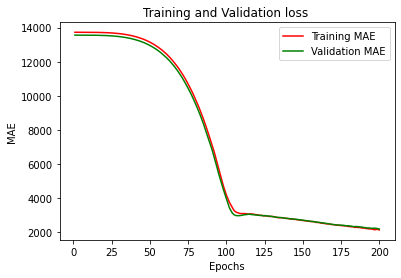

In [37]:

plt.plot(epochs, train_mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'g', label='Validation MAE')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [38]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

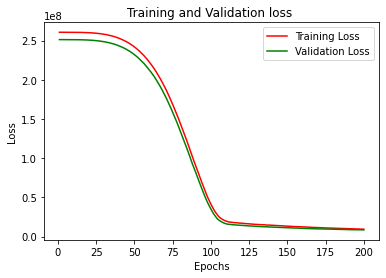

In [39]:
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
Y_test

15     30760.0
92      6849.0
3      13950.0
164     8238.0
23      7957.0
        ...   
53      6695.0
39      8845.0
22      6377.0
40     10295.0
182     7775.0
Name: price, Length: 61, dtype: float64

In [41]:
network.predict(X_test)

array([[32066.596 ],
       [ 5934.8247],
       [13164.165 ],
       [ 7927.1885],
       [ 7624.6494],
       [12325.354 ],
       [24504.236 ],
       [ 5132.2485],
       [23103.49  ],
       [21190.766 ],
       [10748.457 ],
       [25071.74  ],
       [ 8511.248 ],
       [19881.646 ],
       [13556.909 ],
       [ 5737.532 ],
       [ 8569.308 ],
       [15005.245 ],
       [12830.18  ],
       [25716.111 ],
       [ 9097.179 ],
       [20536.459 ],
       [20307.77  ],
       [ 5225.1377],
       [19456.275 ],
       [11220.298 ],
       [10364.239 ],
       [13015.844 ],
       [12675.09  ],
       [ 6946.36  ],
       [11216.55  ],
       [10375.448 ],
       [ 5936.538 ],
       [11749.065 ],
       [ 5920.6294],
       [21547.787 ],
       [ 9542.924 ],
       [ 6419.734 ],
       [13774.884 ],
       [25657.42  ],
       [26316.635 ],
       [19009.688 ],
       [ 6008.1636],
       [18712.613 ],
       [18609.121 ],
       [ 5817.4287],
       [12023.671 ],
       [24021

In [42]:
test_mse_score, test_mae_score  =network.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 14ms/step - loss: 14328607.0000 - mae: 2609.7661
